In [9]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
print(os.getcwd())
with open('../../../result.json') as f:
    lines = f.readlines()
    data = list(map(lambda s:json.loads(s), lines))
    dfAll = pd.DataFrame(data)
    
dfAll = dfAll.loc[dfAll['nTotalMsg']!=9999999]
dfAll['msgPerSec'] = dfAll['msgPerSec'].apply(lambda x: x /1_000_000)
dfAll = dfAll.rename(columns={'nWin': 'Windows'})
dfAll


/Users/terenceng/Documents/KTH/2024 Digital Future/Windowed-CRDT/src/main/python


,nTotalMsg,Windows,nActor,nWinPerAwait,msgPerSec,time
0,20,0,1,3,0.000034,0.594
1,18,0,3,3,0.000720,0.025
2,20,0,5,3,0.000800,0.025
3,20,0,1,3,0.000870,0.023
4,18,0,3,3,0.000857,0.021
5,20,0,5,3,0.000909,0.022
6,20,0,1,3,0.001053,0.019
7,18,0,3,3,0.000500,0.036
8,20,0,5,3,0.000714,0.028
9,20,0,1,3,0.000909,0.022


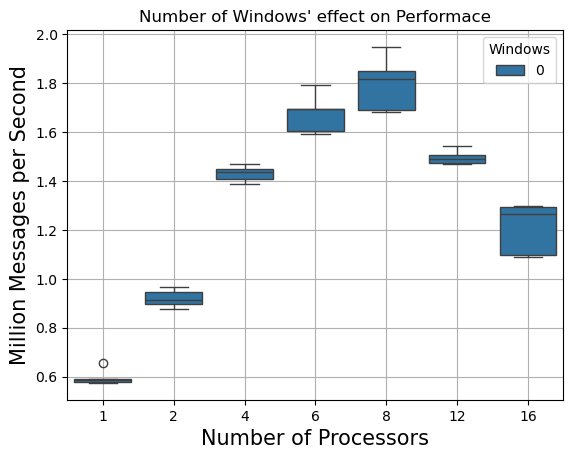

In [8]:
fig, ax = plt.subplots()
# sns.set(font_scale=1.1)
df = dfAll.loc[dfAll['nWinPerAwait']==1]#.loc[dfAll['Windows'].isin([0,20,200])]
df = df[['nActor', 'msgPerSec','Windows']]
p = sns.boxplot(
    x='nActor', 
    y='msgPerSec', 
    data=df, 
    ax = ax,
    hue='Windows'
    )

ax.set_xlabel('Number of Processors', fontsize=15)
ax.set_ylabel('Million Messages per Second', fontsize=15)

ax.grid()
ax.title.set_text('Number of Windows\' effect on Performace')
plt.show()
fig.savefig('../../../target/pre.png', dpi=300)

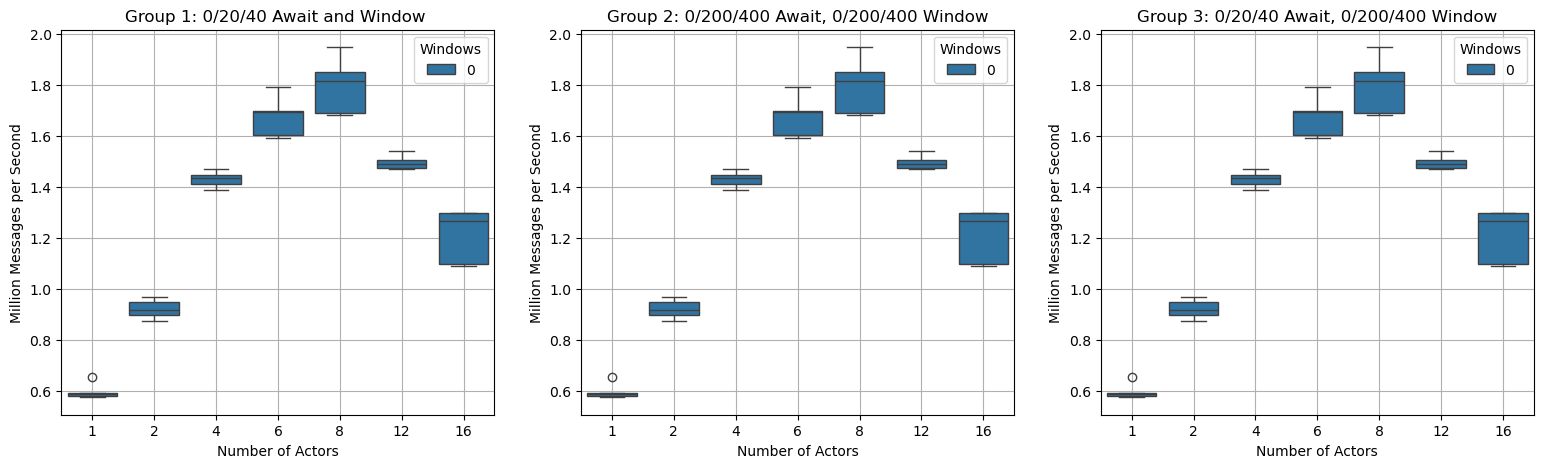

In [5]:
fig, axs = plt.subplots(1, 3, figsize = (19,5))

# plot 1
ax = axs[0]

df = dfAll.loc[dfAll['nWinPerAwait']==1].loc[dfAll['Windows'].isin([0,20,40])]
df = df[['nActor', 'msgPerSec','Windows']]
p = sns.boxplot(
    x='nActor', 
    y='msgPerSec', 
    data=df, 
    ax = ax,
    hue='Windows'
    )

ax.set_xlabel('Number of Actors')
ax.set_ylabel('Million Messages per Second')

ax.grid()
ax.title.set_text('Group 1: 0/20/40 Await and Window ')

# plot 2
ax = axs[1]

df = dfAll.loc[dfAll['nWinPerAwait']==1].loc[dfAll['Windows'].isin([0,200,400])]
df = df[['nActor', 'msgPerSec','Windows']]
p = sns.boxplot(
    x='nActor', 
    y='msgPerSec', 
    data=df, 
    ax = ax,
    hue='Windows'
    )

ax.set_xlabel('Number of Actors')
ax.set_ylabel('Million Messages per Second')

ax.grid()
ax.title.set_text('Group 2: 0/200/400 Await, 0/200/400 Window')

# plot 3
ax = axs[2]

df = dfAll.loc[dfAll['nWinPerAwait']==10].loc[dfAll['Windows'].isin([200,400])]
df = pd.concat([df, dfAll.loc[dfAll['Windows']==0]])
df = df[['nActor', 'msgPerSec','Windows']]
p = sns.boxplot(
    x='nActor', 
    y='msgPerSec', 
    data=df, 
    ax = ax,
    hue='Windows'
    )

ax.set_xlabel('Number of Actors')
ax.set_ylabel('Million Messages per Second')

ax.grid()
ax.title.set_text('Group 3: 0/20/40 Await, 0/200/400 Window')

plt.show()
fig.savefig('../../../target/result.png', dpi=300)